$${\huge{Exercise}}$$

# <font color=blue> Correlation within Iris data set attributes.
   
    
<font size=4> We consider the [Iris data set from scikit learn](https://scikit-learn.org/stable/datasets/index.html)


In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

<font size=4 color =blue> __Change iris.data into a  dataframe using iris.feature_names as the columns label.__    

In [12]:
import pandas as pd

# Create DataFrame using iris.data and iris.feature_names
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [20]:
iris_df.shape

(150, 4)

<font size=4 color =blue> __Find the Correlation Matrix for the Data Frame and tell me what two features are most correlated__ 

In [15]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<font size =4 color=bown> __petal width and petal length__

<font size=4 color =blue> __Use Scikit learn to do a linear regression for X=petal length and y= petal width.__ 
* Graph the line along with the data ( use l0=np.linspace(0,8, 100) to generate the points you predict on)
* Print  the coefficients of the regression model
    
<font color =red> You may  have the most luck using the array iris.data.  Also you need to reshape from (150,) to (150,1) 

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
######################################### linear
reg=linear_model.LinearRegression()

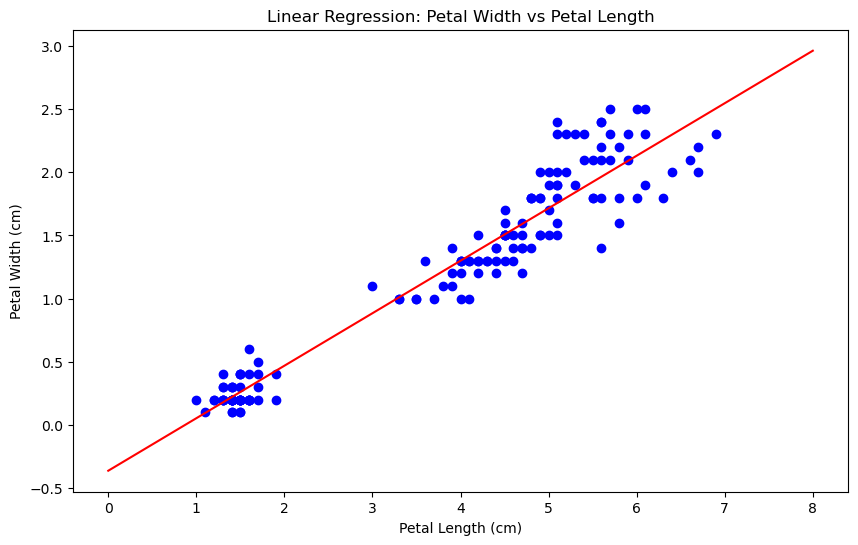

In [30]:
# Get X and y data from iris dataset
X = iris.data[:, 2].reshape(-1, 1)  # petal length
y = iris.data[:, 3].reshape(-1,1)  # petal width

# Fit the linear regression model
reg.fit(X, y)

# Generate points for prediction line
# new=2
# a=reg.predict([[new]])
b=reg.coef_[0][0]
a=reg.intercept_[0]
l0 = np.linspace(0, 8, 100)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(l0, a + b*l0, color='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Linear Regression: Petal Width vs Petal Length')
plt.show()

In [32]:
# Print the coefficients
print(f'Slope: {reg.coef_[0]:.4f}')
print(f'Intercept: {reg.intercept_:.4f}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

<font size=4 color=blue>__Use this to predict what the   petal width will be if the petal length is 3__

In [31]:
reg.predict([[3]])

array([[0.88419073]])

<font size=4 color=blue>__What is the $R^2$?__ 

In [33]:
print("Line Fit",reg.score(X,y))

Line Fit 0.9271098389904927


<font size=4 color=blue>__Repeat for  a quadratic fit. Plot and compare.__

a1= -0.38678103123565477 b1= 0.433833494542968 c1= -0.0025689241875870654


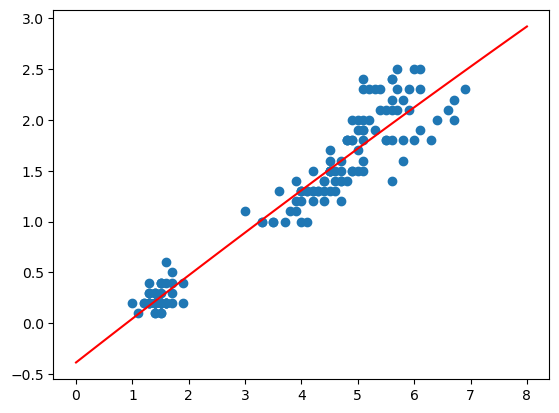

In [35]:
# Get X and y data from iris dataset
X = iris.data[:, 2].reshape(150, 1)  # petal length
y = iris.data[:, 3].reshape(150,1)  # petal width

poly_f=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_f.fit_transform(X)
reg.fit(X_poly,y)
a1=reg.intercept_[0]
b1=reg.coef_[0][0]
c1=reg.coef_[0][1]
l0 = np.linspace(0, 8, 100)
plt.scatter(X,y)

#differnet way to plot using prdeict function


l1=l0.reshape(-1,1)

L1=poly_f.fit_transform(l1) 
plt.plot(l1,reg.predict(L1), "r")
#plt.plot(l0, a1 + b1*l0+c1*np.power(l0,2), "r")
print("a1=",a1,"b1=",b1,"c1=",c1)

In [37]:
print("Quadratic Fit",reg.score(X_poly,y))

Quadratic Fit 0.9271679557444837


<font size=4 color=blue>__Why does it look so similar to the linear fit?__ 

<font size =4 color=bown> no much effect by squaring x

<font size=4 color=blue>__What about a polynomial of degree 4? Plot and compare.__  

a1= -0.4615886807160541 b1= 0.8211054850626918 c1= -0.34324571510461555


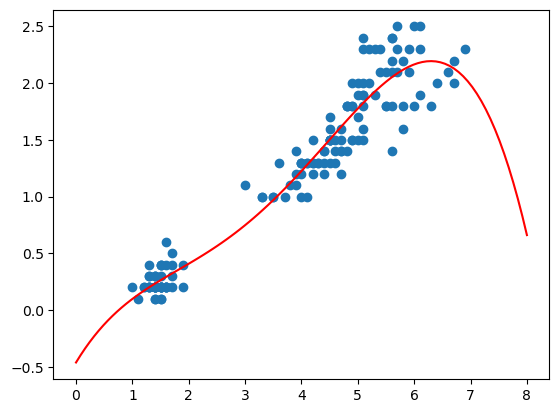

In [27]:
# Get X and y data from iris dataset
X = iris.data[:, 2].reshape(150, 1)  # petal length
y = iris.data[:, 3].reshape(150,1)  # petal width

poly_f=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly_f.fit_transform(X)
reg.fit(X_poly,y)
a1=reg.intercept_[0]
b1=reg.coef_[0][0]
c1=reg.coef_[0][1]
l0 = np.linspace(0, 8, 100)
plt.scatter(X,y)

#differnet way to plot using prdeict function


l1=l0.reshape(-1,1)

L1=poly_f.fit_transform(l1) 
plt.plot(l1,reg.predict(L1), "r")
#plt.plot(l0, a1 + b1*l0+c1*np.power(l0,2), "r")
print("a1=",a1,"b1=",b1,"c1=",c1)

<font size=4 color=blue>__Just looking at the graph do you like this better or worse?__  

<font size=4 color =brown> worse 